In [1]:
from cobra.postgres.interface import PgInterface
from cobra.utils.osmiq import OsmIq

In [2]:
osmiq = OsmIq()

In [3]:
osmiq.osm_tag_stats(key='power',value='substation', schema='portugalpower')

{'point': 319, 'line': 1088, 'polygon': 11, 'roads': 0}

In [4]:
from matplotlib import pyplot as plt

In [5]:
def create_jointed_point_feature(key, value, schema):
    
    i = PgInterface()
    sql = f"SELECT way AS geom, osm_id, substation, ST_Centroid(way) FROM portugalpower.planet_osm_point WHERE {key} = '{value}'"
    point_df = i.get_gdf(sql)
    sql = f"SELECT way AS geom, osm_id, substation, ST_Centroid(way) FROM portugalpower.planet_osm_line WHERE {key} = '{value}'"
    line_df = i.get_gdf(sql)
    sql = f"SELECT way AS geom, osm_id, substation, ST_Centroid(way) FROM portugalpower.planet_osm_polygon WHERE {key} = '{value}'"
    polygon_df = i.get_gdf(sql)
    
    ax = point_df.plot()
    line_df.plot(ax=ax)
    polygon_df.plot(ax=ax)

    plt.show()
    

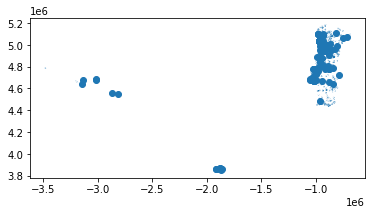

AttributeError: 'NoneType' object has no attribute 'plot'

In [6]:
create_jointed_point_feature(key='power', value='substation', schema='portugalpower').plot(figsize=(16, 16))

In [ ]:
# SELECT osm_id, substation, way, location, operator, name FROM portugalpower.planet_osm_point WHERE power = 'substation'

In [7]:
datamodel = {
    'osm_id': 'bigint',
    'substation':'text',
    'way':'geometry',
    'location':'text',
    'operator':'text',
    'name':'text'
}